In [1]:
import torch
import torchvision
from torchvision import transforms, datasets

In [23]:
import torch.nn as nn
import torch.nn.functional as F

In [35]:
import torch.optim as optim

In [8]:
import matplotlib.pyplot as plt

In [3]:
train = datasets.MNIST("", train=True, 
                       download=True,
                       transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train=False, 
                       download=True,
                       transform=transforms.Compose([transforms.ToTensor()]))


Extracting MNIST\raw\train-images-idx3-ubyte.gz to MNIST\raw




Extracting MNIST\raw\train-labels-idx1-ubyte.gz to MNIST\raw




Extracting MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST\raw




Extracting MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST\raw



In [4]:
trainset = torch.utils.data.DataLoader(train, 
                                       batch_size=10, 
                                       shuffle=True)

testset = torch.utils.data.DataLoader(test, 
                                      batch_size=10, 
                                      shuffle=True)

In [6]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [13]:
x, y = data[0][0], data[1][0]

print(y)

tensor(8)


In [10]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


# Image is 28 by 28 pixels

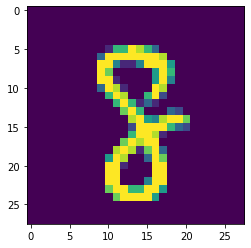

In [11]:
plt.imshow(data[0][0].view(28, 28))

In [18]:
total = 0
counter = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

In [19]:
for data in trainset:
    Xs, ys = data   
    
    for y in ys:
        counter[int(y)] += 1       
    
    total += 1

In [20]:
counter

{0: 5923,
 1: 6742,
 2: 5958,
 3: 6131,
 4: 5842,
 5: 5421,
 6: 5918,
 7: 6265,
 8: 5851,
 9: 5949}

In [22]:
for i in counter:
    print(f'{i} : {counter[i]/total*10}')

0 : 9.871666666666666
1 : 11.236666666666666
2 : 9.93
3 : 10.218333333333334
4 : 9.736666666666666
5 : 9.035
6 : 9.863333333333333
7 : 10.441666666666666
8 : 9.751666666666667
9 : 9.915000000000001


In [26]:
class Net(nn.Module):   
    
    def __init__(self):
        super().__init__()
        
        # fc = layer
        #self.fc1 = nn.Linear(input_size, output)
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
    
    
    # Feed forward network
    def forward(self, x):
        
        # relu = rectified linear activation function
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        # dim ~ axis
        return F.log_softmax(x, dim=1)

In [27]:
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [32]:
X = torch.rand((28, 28))

In [38]:
X = X.view([-1, 28*28])
X

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [34]:
output = net(X)
output

tensor([[-2.2727, -2.2681, -2.2466, -2.2582, -2.2540, -2.3521, -2.4002, -2.2126,
         -2.3653, -2.4196]], grad_fn=<LogSoftmaxBackward0>)

# P4

In [36]:
# lr = learning rate
optimizer = optim.Adam(net.parameters(), lr=0.001)

# epochs = number of times entire data is passed through thee network
EPOCHS = 3

In [37]:
for epoch in range(EPOCHS):
    for data in trainset:
        
        # data is a batch of feature sets and labels
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        
        # adjust weights
        optimizer.step()
    
    print(loss)
        

tensor(0.0044, grad_fn=<NllLossBackward0>)
tensor(0.0395, grad_fn=<NllLossBackward0>)
tensor(0.0358, grad_fn=<NllLossBackward0>)


In [40]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 28*28))
        
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
            
print('Accuracy', round(correct/total, 3))

Accuracy 0.979


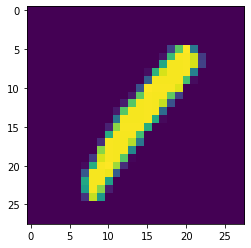

In [52]:
plt.imshow(X[0].view(28, 28))

In [53]:
print(torch.argmax(net(X[0].view(-1, 784))[0]))

tensor(1)
